### Test ClusterMap pipeline

In [1]:
from ClusterMap.clustermap import *
import tifffile
import seaborn as sns
import matplotlib.pyplot as plt

# Read spots and dapi image

In [2]:
### read spots and dapi image
spots = pd.read_csv('/Users/yichunhe/Dropbox (Harvard University)/GITHUB_data/ClusterMap2/tile_75_3D_spot_meta.csv')
dapi = tifffile.imread('/Users/yichunhe/Dropbox (Harvard University)/GITHUB_data/ClusterMap2/20210216-Well01-OB-SeqA1-DAPI_20210216-Well01-OB-SeqA1-DAPI_Tile 75_cmle_ch04.tiff')
dapi = np.transpose(dapi, (1,2,0))
### set radius parameters
xy_radius=20
z_radius=10

# Perform cell segmentation

In [3]:
### instantiate model
num_gene=np.max(spots['gene'])
model = ClusterMap(spots=spots, dapi=dapi, gene_list=np.arange(1,num_gene+1), num_dims=len(dapi.shape),
                   xy_radius=xy_radius,z_radius=z_radius,fast_preprocess=True)

### plot GT segmentation results
# model.plot_segmentation(figsize=(10,10),s=1,method='spot_cell_id',plot_dapi=True)

100%|██████████| 30/30 [00:00<00:00, 94.49it/s]


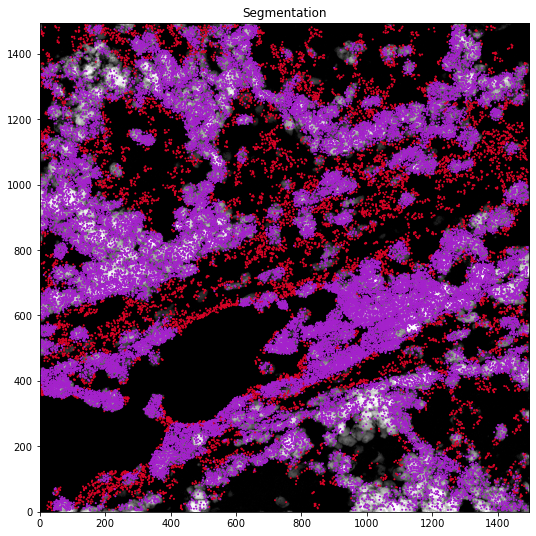

In [4]:
### preprocessing: default: filter 10% spots out
pct_filter=0.2
model.preprocess(pct_filter)

### plot preprocessing results
model.spots['is_noise']=model.spots['is_noise']+1
model.plot_segmentation(figsize=(20,9),s=1,method='is_noise',plot_dapi=True)
model.spots['is_noise']=model.spots['is_noise']-min(model.spots['is_noise'])-1

In [7]:
### segmentation
# %% time
model.min_spot_per_cell=10
model.segmentation(dapi_grid_interval=5,add_dapi=True,use_genedis=False)

After denoising, mRNA spots: 38109
Computing NGC coordinates


38109it [00:00, 124038.60it/s]


After adding DAPI points, all spots:130895
DPC
  Compute spatial distance


130895it [00:01, 101973.33it/s]


  Compute genetic distance


130895it [00:15, 8594.79it/s] 


  Compute density rho and the nearest distance


130895it [00:04, 32204.19it/s]
100%|██████████| 61/61 [00:00<00:00, 466.22it/s]


  Find cell number:975.0


100%|██████████| 130895/130895 [00:00<00:00, 748896.02it/s]


Postprocessing


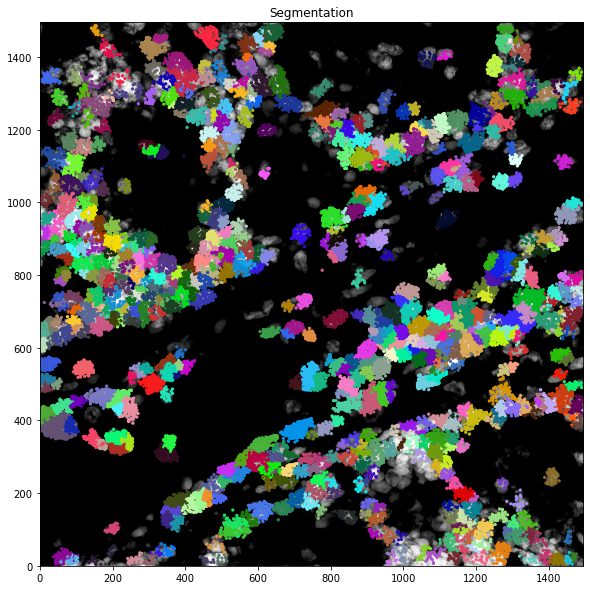

In [9]:
### plot segmentation results
model.plot_segmentation(figsize=(10,10),s=5,method='clustermap',plot_dapi=True)

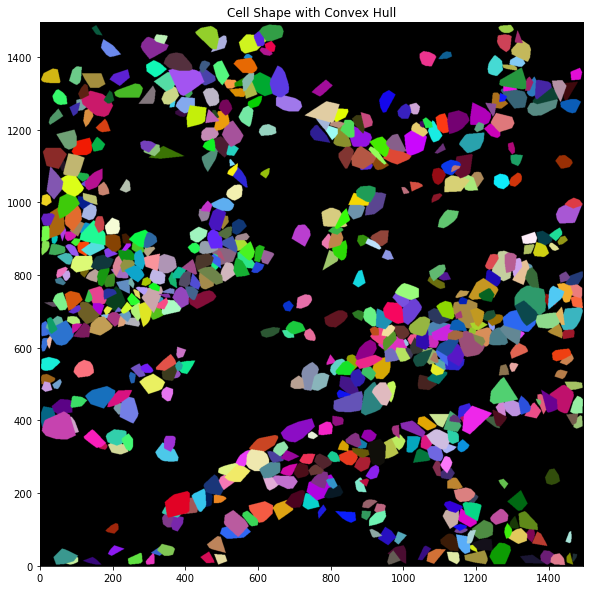

In [10]:
# plot convex hull 
model.create_convex_hulls(figsize=(10,10))

In [11]:
model.calculate_metrics(gt_column='spot_cell_id')

OverSegmentation Score = 0.14793543285060318 
UnderSegmentation Score = 0.09639982239982241


(0.09639982239982241, 0.14793543285060318)

# Stitch all tiles if necessary

In [ ]:
# path_res = 'D:/ClusterMap_Data/CNS-OB/spots_res_v2_thresh_density/'
# path_config = 'C:/Didou/Pro/devoirs/Mines/2A/S4E/Spatial_Mapping/ClusterMap2/SpotStitch/TileConfiguration.txt'

# model_stitch = StitchSpots(path_res=path_res,
#                            path_config=path_config,
#                            res_name='leiden')

In [ ]:
# ### Load config
# model_stitch.gather_tiles()
# model_stitch.spots_gathered

In [ ]:
# model_stitch.stitch_tiles()
# model_stitch.plot_stitched_data()

# Perform cell typing

In [ ]:
# path_res = 'D:/ClusterMap_Data/CNS-OB/stitched_thresh_density/spot_meta_all.csv'
# var_path = 'D:/ClusterMap_Data/CNS-OB/stitched_thresh_density/output/var.csv'
# model_2 = CellTyping(spots_stitched_path=path_res,
#                      var_path=var_path,
#                      gene_list=gene_list,
#                      method='cellid',
#                      use_z=use_z)

In [ ]:
# model_2.gene_profile(min_counts_cells=19,
#                     min_cells=10,
#                     plot=True)

In [ ]:
# model_2.cell_typing(n_neighbors=20,
#                     resol=0.3, n_clusters=10,
#                     type_clustering='leiden')

Plot cell typing results

In [ ]:
# model_2.plot_cell_typing_heatmap(figsize=(20,10))

In [ ]:
# model_2.plot_cell_typing_spots(figsize=(32,20), s=5)

In [ ]:
# %%time
# model_2.create_cell_shape(kernel=np.ones((3,3)),
#                           num_iter=5,
#                           median_size=3,
#                           figsize=(32,20),
#                           s=0.2)


# Perform tissue layer identification

# Perform cell niche analysis